In [29]:
import json
import matplotlib.pyplot as plt

# Load data from a JSON file
result_json_files = [
    '/home/denghui/deepmd-kit/computational-materials/fcc-Al/abacus_apex/all_result.json',
    '/home/denghui/deepmd-kit/computational-materials/fcc-Al/vasp_apex/all_result.json',
    '/home/denghui/deepmd-kit/computational-materials/fcc-Al/dp_apex/all_result.json',
    '/home/denghui/deepmd-kit/computational-materials/fcc-Al/eam_apex/all_result.json',
    '/home/denghui/deepmd-kit/computational-materials/fcc-Al/meam_apex/all_result.json'
]

potentials = ['abacus', 'vasp', 'dp', 'eam', 'meam']

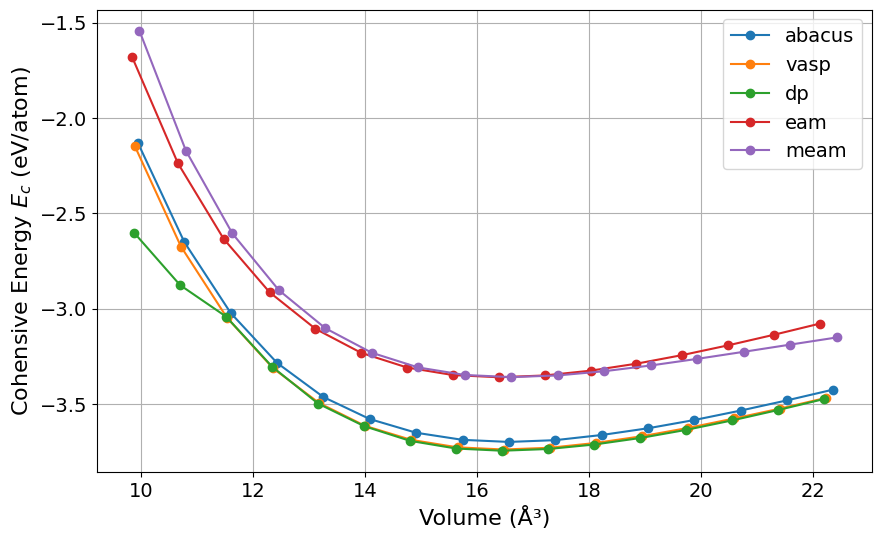

In [39]:
eos = [None] * 5
eos_volume = [None] * 5
eos_energy = [None] * 5
single_atom_energy = [-1879.493604984052, -0.00705158, 0, 0, 0]

def extract_data(json_file, key):
    with open(json_file, 'r') as file:
        data = json.load(file)
    return data.get('confs/fcc-Al', {})[key]

for ii in range(0, 5):
    eos[ii] = extract_data(result_json_files[ii], 'eos_00')
    eos_volume[ii] = [float(item) for item in list(eos[ii]['result'].keys())]
    eos_energy[ii] = [-single_atom_energy[ii] + float(item) for item in list(eos[ii]['result'].values())]

plt.figure(figsize=(10, 6))
for ii in range(0, 5): 
    plt.plot(eos_volume[ii], eos_energy[ii], marker='o', linestyle='-', label = potentials[ii])
plt.xlabel('Volume (Å³)', fontsize=16)
plt.ylabel(r'Cohensive Energy $E_c$ (eV/atom)', fontsize=16)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()